In [18]:
! pip install language-tool-python rouge dash jupyter-dash


import nltk
nltk.download('stopwords')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.0 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Text Preprocessing with Sentence Compression**

In [2]:
import spacy
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

# Load English stop words from NLTK
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Preprocesses the input text by segmenting it into sentences
    and extracting POS (Part of Speech) tags for each word.
    """
    doc = nlp(text)  # Parse the text with spaCy
    sentences = [sent.text for sent in doc.sents]  # Extract sentences
    pos_tags = [[(token.text, token.pos_) for token in nlp(sent)] for sent in sentences]  # Extract POS tags
    return sentences, pos_tags

def compress_sentence(sentence):
    """
    Compresses the sentence by removing stop words to focus on key information.
    """
    words = sentence.split()
    compressed = ' '.join([word for word in words if word.lower() not in stop_words])
    return compressed

def preprocess_and_compress(text):
    """
    Preprocesses the text and applies sentence compression.
    """
    sentences, pos_tags = preprocess_text(text)  # Preprocess the text
    compressed_sentences = [compress_sentence(sent) for sent in sentences]  # Compress each sentence
    return compressed_sentences, pos_tags

# Example usage
text = """Natural language processing is a fascinating field.
It involves making computers understand human languages."""
compressed_sentences, pos_tags = preprocess_and_compress(text)
print("Compressed Sentences:", compressed_sentences)  # Display compressed sentences
print("POS Tags:", pos_tags)  # Display POS tags for analysis

Compressed Sentences: ['Natural language processing fascinating field.', 'involves making computers understand human languages.']
POS Tags: [[('Natural', 'ADJ'), ('language', 'NOUN'), ('processing', 'NOUN'), ('is', 'AUX'), ('a', 'DET'), ('fascinating', 'ADJ'), ('field', 'NOUN'), ('.', 'PUNCT'), ('\n', 'SPACE')], [('It', 'PRON'), ('involves', 'VERB'), ('making', 'VERB'), ('computers', 'NOUN'), ('understand', 'VERB'), ('human', 'ADJ'), ('languages', 'NOUN'), ('.', 'PUNCT')]]


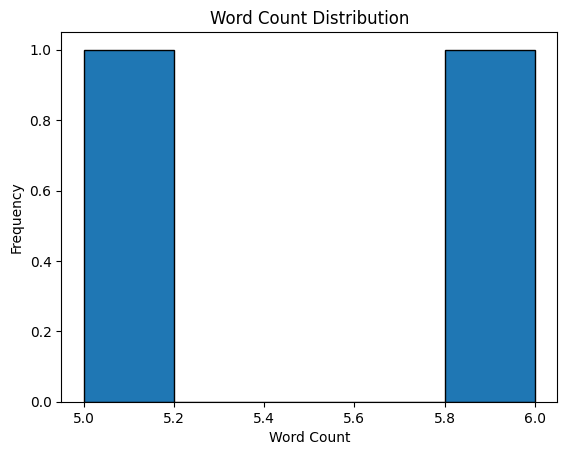

In [3]:
# Visualization 1: Word Count Distribution
import matplotlib.pyplot as plt

word_counts = [len(sent.split()) for sent in compressed_sentences]  # Count words in each sentence
plt.hist(word_counts, bins=5, edgecolor='black')
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

**Context-Free Grammar (CFG) Construction**

In [4]:
import nltk
from nltk import CFG

# Define CFG rules to describe sentence structure
grammar = CFG.fromstring("""
    S -> NP VP
    NP -> Det N | Det Adj N
    VP -> V NP | V
    Det -> 'a' | 'the'
    N -> 'field' | 'language' | 'computers'
    Adj -> 'fascinating'
    V -> 'is' | 'involves'
""")

# Example usage
print("CFG Rules:")
print(grammar)  # Display the CFG rules

CFG Rules:
Grammar with 13 productions (start state = S)
    S -> NP VP
    NP -> Det N
    NP -> Det Adj N
    VP -> V NP
    VP -> V
    Det -> 'a'
    Det -> 'the'
    N -> 'field'
    N -> 'language'
    N -> 'computers'
    Adj -> 'fascinating'
    V -> 'is'
    V -> 'involves'


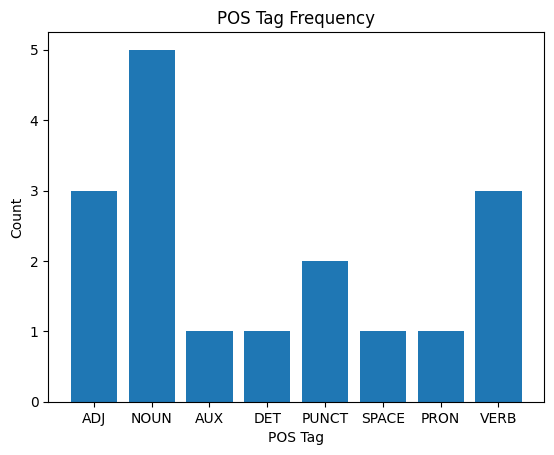

In [5]:
# Visualization 2: POS Tag Frequency
from collections import Counter

all_pos_tags = [tag for sentence in pos_tags for _, tag in sentence]
pos_counts = Counter(all_pos_tags)  # Count the occurrences of POS tags
plt.bar(pos_counts.keys(), pos_counts.values())
plt.title("POS Tag Frequency")
plt.xlabel("POS Tag")
plt.ylabel("Count")
plt.show()

**Sentence Parsing with Pushdown Automata (PDA)**

In [6]:
from nltk.parse import RecursiveDescentParser

def parse_sentence(sentence, grammar):
    """
    Tries to parse the given sentence using CFG rules. If the sentence contains words
    not covered by the grammar, it prints a warning message and skips parsing.
    """
    parser = RecursiveDescentParser(grammar)  # Initialize the parser
    words = sentence.lower().split()  # Tokenize the input sentence

    # Check if all words in the sentence are covered by the grammar
    grammar_words = {word for prod in grammar.productions() for word in prod.rhs()}
    missing_words = [word for word in words if word not in grammar_words]

    if missing_words:
        print(f"Skipping parsing. Grammar does not cover these words: {missing_words}")
    else:
        print(f"Parsing: {sentence}")
        for tree in parser.parse(words):
            tree.pretty_print()  # Print the parse tree

# Example usage: Using a CFG-compliant sentence for parsing
print("\nParse Tree:")
parse_sentence("The language is fascinating", grammar)  # Parsing a compliant sentence


Parse Tree:
Parsing: The language is fascinating


**Relevance Scoring using TF-IDF**

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def compute_tfidf(sentences):
    """
    Computes TF-IDF scores for each sentence to identify key sentences.
    """
    vectorizer = TfidfVectorizer()  # Initialize the vectorizer
    tfidf_matrix = vectorizer.fit_transform(sentences)  # Fit and transform the sentences
    scores = tfidf_matrix.sum(axis=1)  # Sum the TF-IDF scores for each sentence
    return scores

# Example usage
tfidf_scores = compute_tfidf(compressed_sentences)  # Compute scores for the sentences
print("\nTF-IDF Scores:", tfidf_scores)  # Display the scores


TF-IDF Scores: [[2.23606798]
 [2.44948974]]


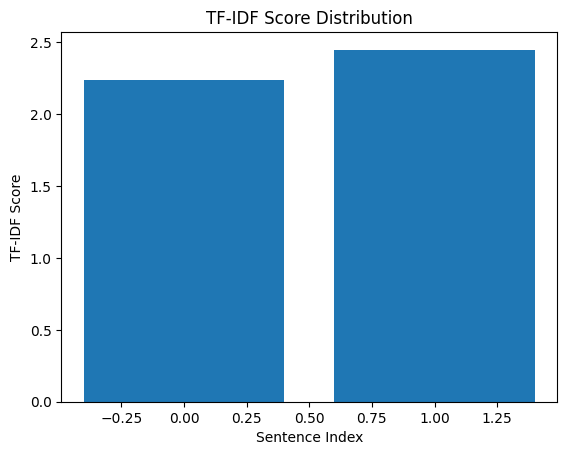

In [8]:
# Visualization 3: TF-IDF Score Distribution
plt.bar(range(len(tfidf_scores)), [score[0, 0] for score in tfidf_scores])
plt.title("TF-IDF Score Distribution")
plt.xlabel("Sentence Index")
plt.ylabel("TF-IDF Score")
plt.show()

**Summary Generation**

In [9]:
import numpy as np

def generate_summary(sentences, scores, top_n=2):
    """
    Selects the top-scoring sentences to generate a concise summary.
    """
    # Convert scores to a 1D array before sorting
    scores_1d = scores.A1 if isinstance(scores, np.matrix) else scores.flatten()

    # Get top sentence indices as integers
    top_indices = np.argsort(scores_1d)[-top_n:]

    # Join the selected sentences
    summary = ' '.join([sentences[i] for i in top_indices])

    return summary

# Example usage
summary = generate_summary(compressed_sentences, tfidf_scores)  # Generate a summary
print("\nGenerated Summary:", summary)  # Display the summary


Generated Summary: Natural language processing fascinating field. involves making computers understand human languages.


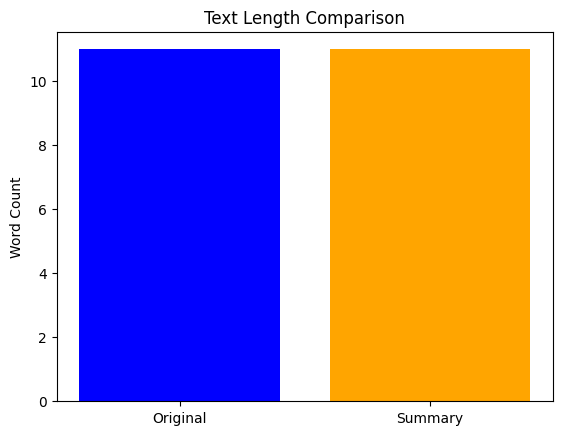

In [10]:
# Visualization 4: Comparison of Original vs. Summary Length
original_length = sum(len(sent.split()) for sent in compressed_sentences)
summary_length = len(summary.split())

plt.bar(["Original", "Summary"], [original_length, summary_length], color=['blue', 'orange'])
plt.title("Text Length Comparison")
plt.ylabel("Word Count")
plt.show()

**Error Handling and Grammar Correction**

In [11]:
import language_tool_python

# Initialize the LanguageTool object for English grammar checking
tool = language_tool_python.LanguageTool('en-US')

def correct_grammar(sentence):
    """
    Detects and corrects grammatical errors in a given sentence using LanguageTool.
    """
    matches = tool.check(sentence)  # Identify grammatical errors
    corrected_sentence = language_tool_python.utils.correct(sentence, matches)  # Apply corrections
    return corrected_sentence

# Example usage
corrected_sentences = [correct_grammar(sent) for sent in compressed_sentences]
print("Corrected Sentences:", corrected_sentences)  # Display corrected sentences

Corrected Sentences: ['Natural language processing fascinating field.', 'Involves making computers understand human languages.']


**TF-IDF Scoring and Weighted Summary Generation**

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def compute_tfidf(sentences):
    """
    Computes the TF-IDF scores for each sentence to measure their importance.
    """
    vectorizer = TfidfVectorizer()  # Initialize the TF-IDF vectorizer
    tfidf_matrix = vectorizer.fit_transform(sentences)  # Create a TF-IDF matrix
    scores = tfidf_matrix.sum(axis=1)  # Sum the scores for each sentence
    return scores

def generate_weighted_summary(sentences, scores, desired_length=30):
    """
    Selects sentences based on TF-IDF scores to create a summary of the desired length.
    """
    # Convert the scores to a 1D array and get the sorted indices
    sorted_indices = np.argsort(scores.A1 if isinstance(scores, np.matrix) else scores.flatten(), axis=0)[::-1]

    summary, length = "", 0  # Initialize summary and its length

    # Select sentences until the desired length is reached
    for idx in sorted_indices:
        if length + len(sentences[idx].split()) > desired_length:
            break
        summary += sentences[idx] + " "  # Add sentence to summary
        print(sentences[idx])
        length += len(sentences[idx].split())  # Update the word count

    return summary.strip()  # Return the final summary

# Example usage
scores = compute_tfidf(corrected_sentences)  # Compute TF-IDF scores
print("TF-IDF Scores:", scores)  # Display the scores
summary = generate_weighted_summary(corrected_sentences, scores)  # Generate a weighted summary
print("Summary:", summary)  # Display the summary

TF-IDF Scores: [[2.23606798]
 [2.44948974]]
Involves making computers understand human languages.
Natural language processing fascinating field.
Summary: Involves making computers understand human languages. Natural language processing fascinating field.


**Evaluation with ROUGE Metrics**

In [13]:
from rouge import Rouge

def evaluate_summary(summary, reference):
    """
    Evaluates the generated summary using ROUGE metrics by comparing it with a reference summary.
    """
    rouge = Rouge()  # Initialize the ROUGE evaluator
    scores = rouge.get_scores(summary, reference, avg=True)  # Compute ROUGE scores
    return scores

# Example usage
reference_summary = "Natural language processing involves understanding human languages."
evaluation_scores = evaluate_summary(summary, reference_summary)  # Evaluate the summary
print("\nROUGE Evaluation Scores:", evaluation_scores)  # Display ROUGE scores



ROUGE Evaluation Scores: {'rouge-1': {'r': 0.7142857142857143, 'p': 0.45454545454545453, 'f': 0.5555555508024692}, 'rouge-2': {'r': 0.5, 'p': 0.3, 'f': 0.3749999953125}, 'rouge-l': {'r': 0.7142857142857143, 'p': 0.45454545454545453, 'f': 0.5555555508024692}}


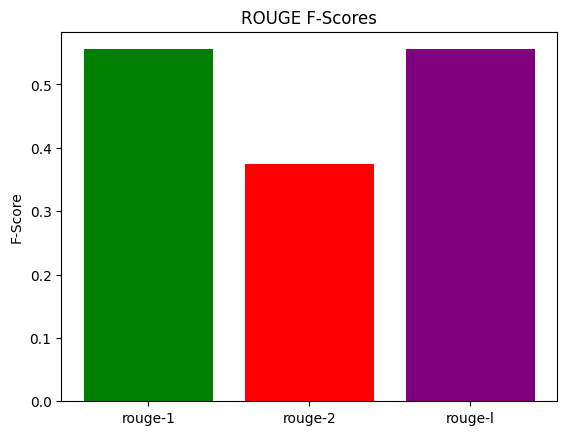

In [14]:
# Visualization 5: ROUGE Score Comparison
rouge_types = ["rouge-1", "rouge-2", "rouge-l"]
rouge_f_scores = [evaluation_scores[metric]['f'] for metric in rouge_types]

plt.bar(rouge_types, rouge_f_scores, color=['green', 'red', 'purple'])
plt.title("ROUGE F-Scores")
plt.ylabel("F-Score")
plt.show()

**Final Testing**

In [16]:
# Example usage: Complete Workflow

# Input text (Larger Paragraph)
text = """Natural language processing (NLP) is a branch of artificial intelligence (AI)
focused on the interaction between computers and humans through natural languages.
The goal of NLP is to read, decipher, understand, and make sense of the human language
in a way that is valuable. Current applications of NLP include language translation,
chatbots, sentiment analysis, and voice recognition systems. The field is constantly
evolving, with new models such as BERT and GPT transforming the landscape. Despite the
advances, NLP faces challenges, including understanding contextual meaning, handling
ambiguities, and processing idiomatic expressions. Nonetheless, NLP plays a crucial role
in bridging the gap between human communication and computer comprehension."""

# Step 1: Preprocess the text
compressed_sentences, pos_tags = preprocess_and_compress(text)
print("\nCompressed Sentences:", compressed_sentences)  # Display the sentences after preprocessing
print("\nPOS Tags:", pos_tags)  # Display POS tags for each word

# Step 2: Display CFG rules
print("\nCFG Rules:")
print(grammar)  # Display the CFG rules

# Step 3: Parse a sample sentence from the input
print("\nParse Tree:")
parse_sentence("The field is constantly evolving", grammar)  # Parse a sample sentence

# Step 4: Compute TF-IDF scores for the sentences
tfidf_scores = compute_tfidf(compressed_sentences)
print("\nTF-IDF Scores:", tfidf_scores)  # Display TF-IDF scores for each sentence

# Step 5: Generate a summary from the top-scoring sentences
summary = generate_summary(compressed_sentences, tfidf_scores, top_n=3)  # Select top 3 sentences
print("Original Sentence:", text)
print("\nGenerated Summary:", summary)  # Display the generated summary

# Step 6: Evaluate the summary with ROUGE metrics
reference_summary = (
    "NLP focuses on human-computer interaction through language. "
    "Despite challenges, NLP has applications in translation, chatbots, and voice recognition."
)
evaluation_scores = evaluate_summary(summary, reference_summary)
print("\nROUGE Evaluation Scores:", evaluation_scores)  # Display ROUGE scores



Compressed Sentences: ['Natural language processing (NLP) branch artificial intelligence (AI) focused interaction computers humans natural languages.', 'goal NLP read, decipher, understand, make sense human language way valuable.', 'Current applications NLP include language translation, chatbots, sentiment analysis, voice recognition systems.', 'field constantly evolving, new models BERT GPT transforming landscape.', 'Despite advances, NLP faces challenges, including understanding contextual meaning, handling ambiguities, processing idiomatic expressions.', 'Nonetheless, NLP plays crucial role bridging gap human communication computer comprehension.']

POS Tags: [[('Natural', 'ADJ'), ('language', 'NOUN'), ('processing', 'NOUN'), ('(', 'PUNCT'), ('NLP', 'PROPN'), (')', 'PUNCT'), ('is', 'AUX'), ('a', 'DET'), ('branch', 'NOUN'), ('of', 'ADP'), ('artificial', 'ADJ'), ('intelligence', 'NOUN'), ('(', 'PUNCT'), ('AI', 'PROPN'), (')', 'PUNCT'), ('\n', 'SPACE'), ('focused', 'VERB'), ('on', 'AD

In [19]:
from dash import Dash, dcc, html
from jupyter_dash import JupyterDash

# Step 5: Generate the summary
summary = generate_summary(compressed_sentences, tfidf_scores, top_n=3)  # Select top 3 sentences

# Initialize the Dash app
app = JupyterDash(__name__)

# Define the app layout with two tabs: Original Text and Summary
app.layout = html.Div([
    dcc.Tabs([
        dcc.Tab(label='Original Text', children=[
            html.Div([
                html.H3("Original Text"),
                html.P(text)  # Display the original text
            ], style={'padding': '20px'})
        ]),
        dcc.Tab(label='Generated Summary', children=[
            html.Div([
                html.H3("Generated Summary"),
                html.P(summary)  # Display the summary
            ], style={'padding': '20px'})
        ])
    ])
])

# Run the app in Jupyter Notebook
app.run_server(mode='inline')

/usr/local/lib/python3.10/dist-packages/dash/dash.py:585: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>